**Import the necessary libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

**Load data into pandas dataframe**


In [2]:
user_data = pd.read_csv(r'D:\MACHINE LEARNING\Mentorship program\ML Project1\features_data.csv')
equity_data = pd.read_csv(r'D:\MACHINE LEARNING\Mentorship program\ML Project1\equity_value_data.csv')

In [3]:
user_data.head()

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91


In [4]:
equity_data.head()

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


In [5]:
equity_data_first = equity_data.groupby("user_id").first()

In [6]:
equity_data_first=equity_data_first.reset_index('user_id')

In [7]:
equity_data_first

,user_id,timestamp,close_equity
0,0012db34aa7b083f5714e7831195e54d,2016-08-18T00:00:00Z,1211.6055
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18T00:00:00Z,2756.3100
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16T00:00:00Z,100.0000
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23T00:00:00Z,505.9700
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18T00:00:00Z,131.5515
...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2016-08-18T00:00:00Z,226.8878
5580,ffa12d2f97e310910291f9b26fb2318d,2016-08-17T00:00:00Z,2750.9388
5581,ffae713096867a32e74f633060667153,2016-09-28T00:00:00Z,19.7401
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-02-15T00:00:00Z,42.7200


**To check if any of the users started before 2016-08-16**

In [8]:
import datetime
date1=datetime.date(2016,8,16)
equity_data_first['timestamp']=pd.to_datetime(equity_data_first['timestamp']).dt.date
# equity_data_first[equity_data_first['timestamp'].iloc[:]>=date1]
equity_data_first['tstmp']=equity_data_first['timestamp']-date1
equity_data_first['days_diff']=equity_data_first['tstmp'].dt.days
equity_data_first

,user_id,timestamp,close_equity,tstmp,days_diff
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,1211.6055,2 days,2
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18,2756.3100,2 days,2
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16,100.0000,184 days,184
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23,505.9700,191 days,191
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18,131.5515,2 days,2
...,...,...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2016-08-18,226.8878,2 days,2
5580,ffa12d2f97e310910291f9b26fb2318d,2016-08-17,2750.9388,1 days,1
5581,ffae713096867a32e74f633060667153,2016-09-28,19.7401,43 days,43
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-02-15,42.7200,183 days,183


In [9]:
equity_data_last = equity_data.groupby("user_id").last()
equity_data_last=equity_data_last.reset_index('user_id')
equity_data_last

,user_id,timestamp,close_equity
0,0012db34aa7b083f5714e7831195e54d,2017-08-17T00:00:00Z,487.7885
1,001d6c77dbdb3213cead7673f250bfdc,2017-08-17T00:00:00Z,3981.3350
2,002e4653171ddc61c3cd30603cd7bd3e,2017-08-18T00:00:00Z,134.3800
3,00384fa9be6fdca1b786bae70d78f88f,2017-08-18T00:00:00Z,426.2400
4,0042aac295a0d4df88f4b83012778bd4,2017-08-17T00:00:00Z,1769.2150
...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2017-08-17T00:00:00Z,62.1951
5580,ffa12d2f97e310910291f9b26fb2318d,2017-08-16T00:00:00Z,7448.1895
5581,ffae713096867a32e74f633060667153,2017-08-17T00:00:00Z,32.9300
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-08-18T00:00:00Z,25.5900


**To check if the user is churned based on the difference between the last collection date(2017-08-18) and the last entry date of the user**

In [10]:
import datetime
date2=datetime.date(2017,8,18)
equity_data_last['timestamp']=pd.to_datetime(equity_data_last['timestamp']).dt.date
equity_data_last['tstmp']=date2-equity_data_last['timestamp']
equity_data_last['days_diff']=equity_data_last['tstmp'].dt.days
equity_data_last[equity_data_last['days_diff']>=28]

,user_id,timestamp,close_equity,tstmp,days_diff
6,004aab1640f3a04b87b1f404fb4c018d,2017-04-28,25.1400,112 days,112
7,004ea9d7662aa8dc840bbff212cfa4b8,2017-07-10,100.9800,39 days,39
15,00f89f56f25989b0bb7ea05bac2dccc4,2017-05-19,1143.6600,91 days,91
34,01ef51aa8fab66b13d2249bc6ee68975,2017-05-11,27.9182,99 days,99
35,02012c83f5c4508404312aec848e2deb,2017-05-15,1773.7500,95 days,95
...,...,...,...,...,...
5538,fdbb2b7567e059cd920c8401906caa6d,2017-04-21,55.3200,119 days,119
5543,fe17d44323f4bbf332cc2432356116b8,2017-06-09,13.3100,70 days,70
5552,fe8eed9b8cdc7e429d311fffdfa7c9fe,2017-06-22,5536.9400,57 days,57
5562,ff05ebb811f35d2ad064e9026265c4bc,2017-01-19,17.8700,211 days,211


In [11]:
equity_data_last['churned_last']=np.where(equity_data_last['days_diff']>=28,'yes','no')
equity_data_last

,user_id,timestamp,close_equity,tstmp,days_diff,churned_last
0,0012db34aa7b083f5714e7831195e54d,2017-08-17,487.7885,1 days,1,no
1,001d6c77dbdb3213cead7673f250bfdc,2017-08-17,3981.3350,1 days,1,no
2,002e4653171ddc61c3cd30603cd7bd3e,2017-08-18,134.3800,0 days,0,no
3,00384fa9be6fdca1b786bae70d78f88f,2017-08-18,426.2400,0 days,0,no
4,0042aac295a0d4df88f4b83012778bd4,2017-08-17,1769.2150,1 days,1,no
...,...,...,...,...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,2017-08-17,62.1951,1 days,1,no
5580,ffa12d2f97e310910291f9b26fb2318d,2017-08-16,7448.1895,2 days,2,no
5581,ffae713096867a32e74f633060667153,2017-08-17,32.9300,1 days,1,no
5582,ffbda9a14e07718e2b21fb03896d21c5,2017-08-18,25.5900,0 days,0,no


In [12]:
eq_data=equity_data_last[equity_data_last['churned_last']=='yes']
eq_data_new=eq_data[['user_id','churned_last']]
eq_data_new

,user_id,churned_last
6,004aab1640f3a04b87b1f404fb4c018d,yes
7,004ea9d7662aa8dc840bbff212cfa4b8,yes
15,00f89f56f25989b0bb7ea05bac2dccc4,yes
34,01ef51aa8fab66b13d2249bc6ee68975,yes
35,02012c83f5c4508404312aec848e2deb,yes
...,...,...
5538,fdbb2b7567e059cd920c8401906caa6d,yes
5543,fe17d44323f4bbf332cc2432356116b8,yes
5552,fe8eed9b8cdc7e429d311fffdfa7c9fe,yes
5562,ff05ebb811f35d2ad064e9026265c4bc,yes


**To calculate the difference between consecutive dates for each user separately in gap column**

In [13]:
equity_data_new =equity_data.sort_values(by=['user_id', 'timestamp']).reset_index(drop=True)
equity_data_new['timestamp']=pd.to_datetime(equity_data_new['timestamp']).dt.date
equity_data_new['gap'] = equity_data_new.groupby('user_id')['timestamp'].diff()
equity_data_new

,timestamp,close_equity,user_id,gap
0,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d,NaT
1,2016-08-19,1173.5640,0012db34aa7b083f5714e7831195e54d,1 days 00:00:00
2,2016-08-22,1253.0597,0012db34aa7b083f5714e7831195e54d,3 days 00:00:00
3,2016-08-23,1252.9050,0012db34aa7b083f5714e7831195e54d,1 days 00:00:00
4,2016-08-24,1262.1360,0012db34aa7b083f5714e7831195e54d,1 days 00:00:00
...,...,...,...,...
1119153,2017-08-14,2156.2400,ffc1e622f3a0b2666f09a6dcb7f27918,3 days 00:00:00
1119154,2017-08-15,2134.7100,ffc1e622f3a0b2666f09a6dcb7f27918,1 days 00:00:00
1119155,2017-08-16,2152.1200,ffc1e622f3a0b2666f09a6dcb7f27918,1 days 00:00:00
1119156,2017-08-17,2042.2800,ffc1e622f3a0b2666f09a6dcb7f27918,1 days 00:00:00


**To check for Null valules in the data in gap column**

In [14]:
equity_data_new[equity_data_new.isin([np.nan,pd.NaT]).any(1)]

,timestamp,close_equity,user_id,gap
0,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d,NaT
252,2016-08-18,2756.3100,001d6c77dbdb3213cead7673f250bfdc,NaT
504,2017-02-16,100.0000,002e4653171ddc61c3cd30603cd7bd3e,NaT
632,2017-02-23,505.9700,00384fa9be6fdca1b786bae70d78f88f,NaT
756,2016-08-18,131.5515,0042aac295a0d4df88f4b83012778bd4,NaT
...,...,...,...,...
1118095,2016-08-18,226.8878,ff9ee08791e20724a86995ab2bc72578,NaT
1118347,2016-08-17,2750.9388,ffa12d2f97e310910291f9b26fb2318d,NaT
1118599,2016-09-28,19.7401,ffae713096867a32e74f633060667153,NaT
1118823,2017-02-15,42.7200,ffbda9a14e07718e2b21fb03896d21c5,NaT


**Replace the null values with timedelta (0 days)**

In [15]:
equity_data_new['gap'].fillna(pd.Timedelta('0 days'),inplace=True)

**timedelta of gap column into integer values**

In [16]:
equity_data_new['gap_int']=equity_data_new['gap'].dt.days
equity_data_new

,timestamp,close_equity,user_id,gap,gap_int
0,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d,0 days,0
1,2016-08-19,1173.5640,0012db34aa7b083f5714e7831195e54d,1 days,1
2,2016-08-22,1253.0597,0012db34aa7b083f5714e7831195e54d,3 days,3
3,2016-08-23,1252.9050,0012db34aa7b083f5714e7831195e54d,1 days,1
4,2016-08-24,1262.1360,0012db34aa7b083f5714e7831195e54d,1 days,1
...,...,...,...,...,...
1119153,2017-08-14,2156.2400,ffc1e622f3a0b2666f09a6dcb7f27918,3 days,3
1119154,2017-08-15,2134.7100,ffc1e622f3a0b2666f09a6dcb7f27918,1 days,1
1119155,2017-08-16,2152.1200,ffc1e622f3a0b2666f09a6dcb7f27918,1 days,1
1119156,2017-08-17,2042.2800,ffc1e622f3a0b2666f09a6dcb7f27918,1 days,1


**Sort the dataframe (user_data) by user_id**

In [17]:
new_user_data =user_data.sort_values(by=['user_id']).reset_index(drop=True)
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4
...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5


**Number of times a user churned**

In [18]:
user_list_new=equity_data_new[equity_data_new['gap_int']>=28]['user_id']
churned_by_new=['yes']*324
data_new = list(zip(user_list_new,churned_by_new))
churned_new = pd.DataFrame(data_new, columns = ['user_id','churned_last'])
churned_new_df=pd.concat([churned_new,eq_data_new],axis=0)
churned_new_df=churned_new_df.sort_values(by=['user_id']).reset_index(drop=True)
no_of_times_userchurned=churned_new_df.groupby('user_id').count()
no_of_times_userchurned.rename(columns={"churned_last": "no_of_times_userchurn"}, inplace=True)
no_of_times_userchurned.reset_index()

,user_id,no_of_times_userchurn
0,00440034cc4152bfb01b30f5c381c4e3,1
1,004aab1640f3a04b87b1f404fb4c018d,1
2,004ea9d7662aa8dc840bbff212cfa4b8,1
3,005d630a68b4ab3a2f4cd49d9a87c50d,1
4,00f89f56f25989b0bb7ea05bac2dccc4,1
...,...,...
1002,ff0ae95285c43e3a5af84860bffaa544,1
1003,ff377467d4e28b425266a8b2c8b2f5c7,1
1004,ff6d64d75fa2ffd703dabf66b7b86b99,1
1005,ff7610fdd7ac5cbfa0b17aca53af5db4,1


**List of users, those are churned based on the difference between consecutive dates**

In [19]:
user_list=equity_data_new[equity_data_new['gap_int']>=28]['user_id'].drop_duplicates()
user_list=list(user_list)
churned_by_consdiff=['yes']*279
data = list(zip(user_list,churned_by_consdiff))
churned_df1 = pd.DataFrame(data, columns = ['user_id','churn/not_churn'])

user_list1=list(set(new_user_data['user_id']).symmetric_difference(set(churned_df1['user_id'])))
churned_by_consdiff1=['no']*5305
data1= list(zip(user_list1,churned_by_consdiff1))
churned_df2 = pd.DataFrame(data1, columns = ['user_id','churn/not_churn'])

churned_df=pd.concat([churned_df1,churned_df2])
churned_df=churned_df.sort_values(by=['user_id']).reset_index(drop=True)
churned_df

,user_id,churn/not_churn
0,0012db34aa7b083f5714e7831195e54d,no
1,001d6c77dbdb3213cead7673f250bfdc,no
2,002e4653171ddc61c3cd30603cd7bd3e,no
3,00384fa9be6fdca1b786bae70d78f88f,no
4,0042aac295a0d4df88f4b83012778bd4,no
...,...,...
5579,ff9ee08791e20724a86995ab2bc72578,no
5580,ffa12d2f97e310910291f9b26fb2318d,no
5581,ffae713096867a32e74f633060667153,no
5582,ffbda9a14e07718e2b21fb03896d21c5,no


**Create a dataframe based on consecutive difference between dates**

In [20]:
new_user_data['churn_by_consec_diff'] = churned_df['churn/not_churn']
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn_by_consec_diff
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no
...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no


**Add churn_by_lastdate into dataframe(new_user_data)**

In [21]:
new_user_data['churn_by_lastdate'] = equity_data_last['churned_last']
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn_by_consec_diff,churn_by_lastdate
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no,no
...,...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no,no


**Create a column is_churned based on both lastdates and consecutive dates**

In [22]:
final_user_churn=[]
for i in range(len(new_user_data)):
    if (new_user_data['churn_by_lastdate'][i]=='yes') or (new_user_data['churn_by_consec_diff'][i]=='yes'):
        final_user_churn.append('yes')
        i=i+1
    else:
        final_user_churn.append('no')
        i=i+1

In [23]:
new_user_data['is_churned']=final_user_churn

In [24]:
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn_by_consec_diff,churn_by_lastdate,is_churned
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no,no,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no,no,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no,no,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no,no,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no,no,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no,no,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no,no,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no,no,no


In [25]:
new_user_data.drop(columns=['churn_by_lastdate','churn_by_consec_diff'],inplace=True)

**Final dataframe**

In [26]:
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,is_churned
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,0012db34aa7b083f5714e7831195e54d,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,001d6c77dbdb3213cead7673f250bfdc,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,002e4653171ddc61c3cd30603cd7bd3e,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,00384fa9be6fdca1b786bae70d78f88f,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,0042aac295a0d4df88f4b83012778bd4,no
...,...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,ff9ee08791e20724a86995ab2bc72578,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,ffa12d2f97e310910291f9b26fb2318d,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,ffae713096867a32e74f633060667153,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,ffbda9a14e07718e2b21fb03896d21c5,no


**What Percentage of the users have churned in the data provided?**

In [27]:
num_users = len(new_user_data)
num_churned = len(new_user_data[new_user_data['is_churned']=='yes'])

answer1 = 100 * (num_churned/num_users)
answer1

18.0336676217765

**Exploratory data analysis (EDA)**

In [28]:
new_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   object 
 1   investment_experience         5584 non-null   object 
 2   liquidity_needs               5584 non-null   object 
 3   platform                      5584 non-null   object 
 4   time_spent                    5584 non-null   float64
 5   instrument_type_first_traded  5584 non-null   object 
 6   first_deposit_amount          5584 non-null   float64
 7   time_horizon                  5584 non-null   object 
 8   user_id                       5584 non-null   object 
 9   is_churned                    5584 non-null   object 
dtypes: float64(2), object(8)
memory usage: 436.4+ KB


In [29]:
new_user_data.isnull().any().sum()

0

In [30]:
new_user_data.duplicated().any().sum()

0

In [31]:
# from numpy import unique
# for i in range(len(new_user_data.columns)):
#     print(new_user_data.columns[i])
#     print(unique(new_user_data[new_user_data.columns[i]]))
#     print('\n')
               

In [32]:
unique_values = new_user_data.nunique()
unique_values

risk_tolerance                     3
investment_experience              4
liquidity_needs                    3
platform                           3
time_spent                      4502
instrument_type_first_traded      11
first_deposit_amount             317
time_horizon                       3
user_id                         5584
is_churned                         2
dtype: int64

In [33]:
new_user_data.describe(include='all')

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,is_churned
count,5584,5584,5584,5584,5584.000000,5584,5584.000000,5584,5584,5584
unique,3,4,3,3,NaN,11,NaN,3,5584,2
top,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,NaN,stock,NaN,short_time_horizon,0012db34aa7b083f5714e7831195e54d,no
freq,3566,2578,4217,3550,NaN,4827,NaN,2833,1,4577
mean,NaN,NaN,NaN,NaN,34.509706,NaN,633.566805,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,155.080551,NaN,2118.323263,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.848908,NaN,50.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,13.474708,NaN,100.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.823829,NaN,500.000000,NaN,NaN,NaN


In [34]:
new_user_data.drop(columns=['user_id'],axis=1,inplace=True)
new_user_data

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,is_churned
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,no
1,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,no
2,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,no
3,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,no
4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,no
...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,no
5580,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,no
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,no
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,34.150567,stock,2.0,long_time_horizon,no


In [35]:
categorical_cols = ['risk_tolerance','investment_experience','liquidity_needs',
                    'platform','instrument_type_first_traded','time_horizon','is_churned']

In [36]:
numerical_cols = ['time_spent','first_deposit_amount']

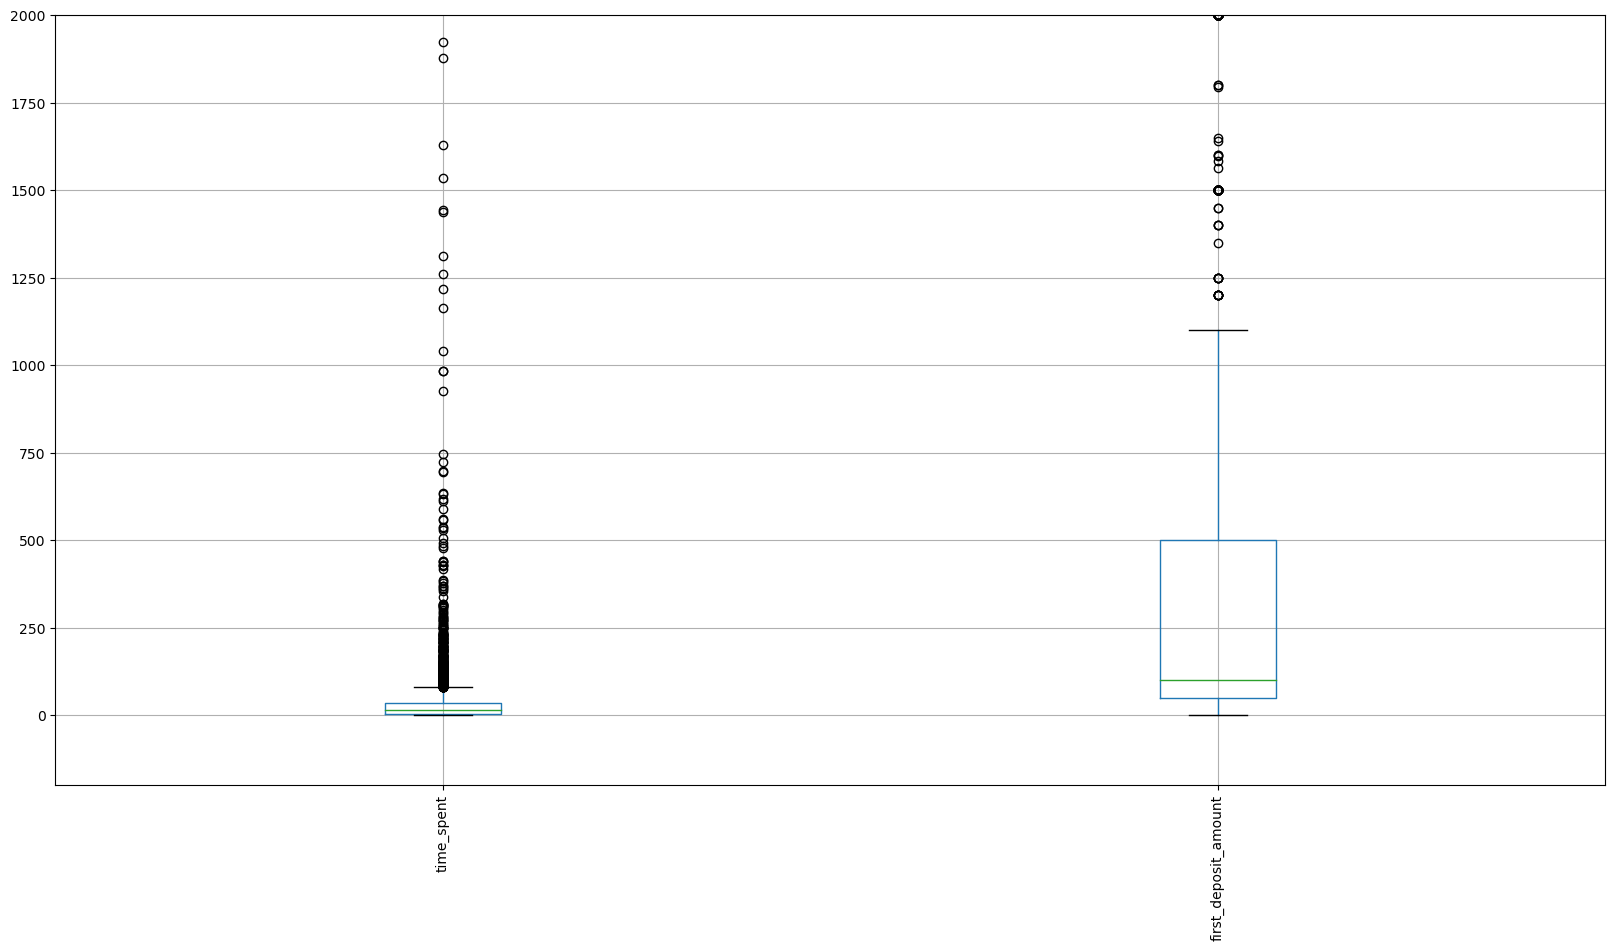

In [37]:
new_user_data[numerical_cols].boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.ylim(-200,2000)
plt.show()

In [38]:
new_user_data['is_churned'].value_counts(normalize=True)

no     0.819663
yes    0.180337
Name: is_churned, dtype: float64

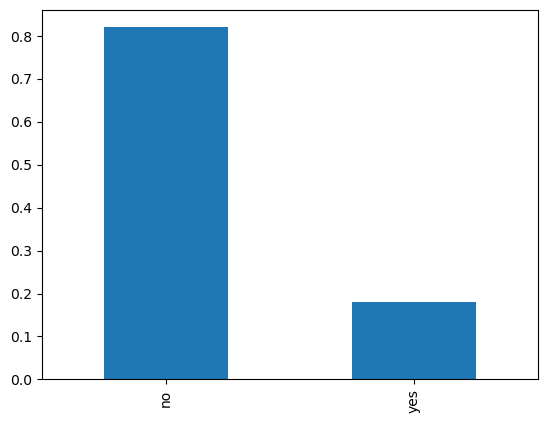

In [39]:
new_user_data['is_churned'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [40]:
new_df=pd.get_dummies(new_user_data,columns=categorical_cols,drop_first=True)
new_df

,time_spent,first_deposit_amount,risk_tolerance_low_risk_tolerance,risk_tolerance_med_risk_tolerance,investment_experience_good_investment_exp,investment_experience_limited_investment_exp,investment_experience_no_investment_exp,liquidity_needs_somewhat_important_liq_need,liquidity_needs_very_important_liq_need,platform_both,...,instrument_type_first_traded_lp,instrument_type_first_traded_mlp,instrument_type_first_traded_reit,instrument_type_first_traded_rlt,instrument_type_first_traded_stock,instrument_type_first_traded_tracking,instrument_type_first_traded_wrt,time_horizon_med_time_horizon,time_horizon_short_time_horizon,is_churned_yes
0,9.701933,100.0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,19.568433,1500.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,22.091867,100.0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,108.555350,500.0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,39.973717,100.0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,4.703033,100.0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5580,6.988433,250.0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5581,8.898000,20.0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5582,34.150567,2.0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


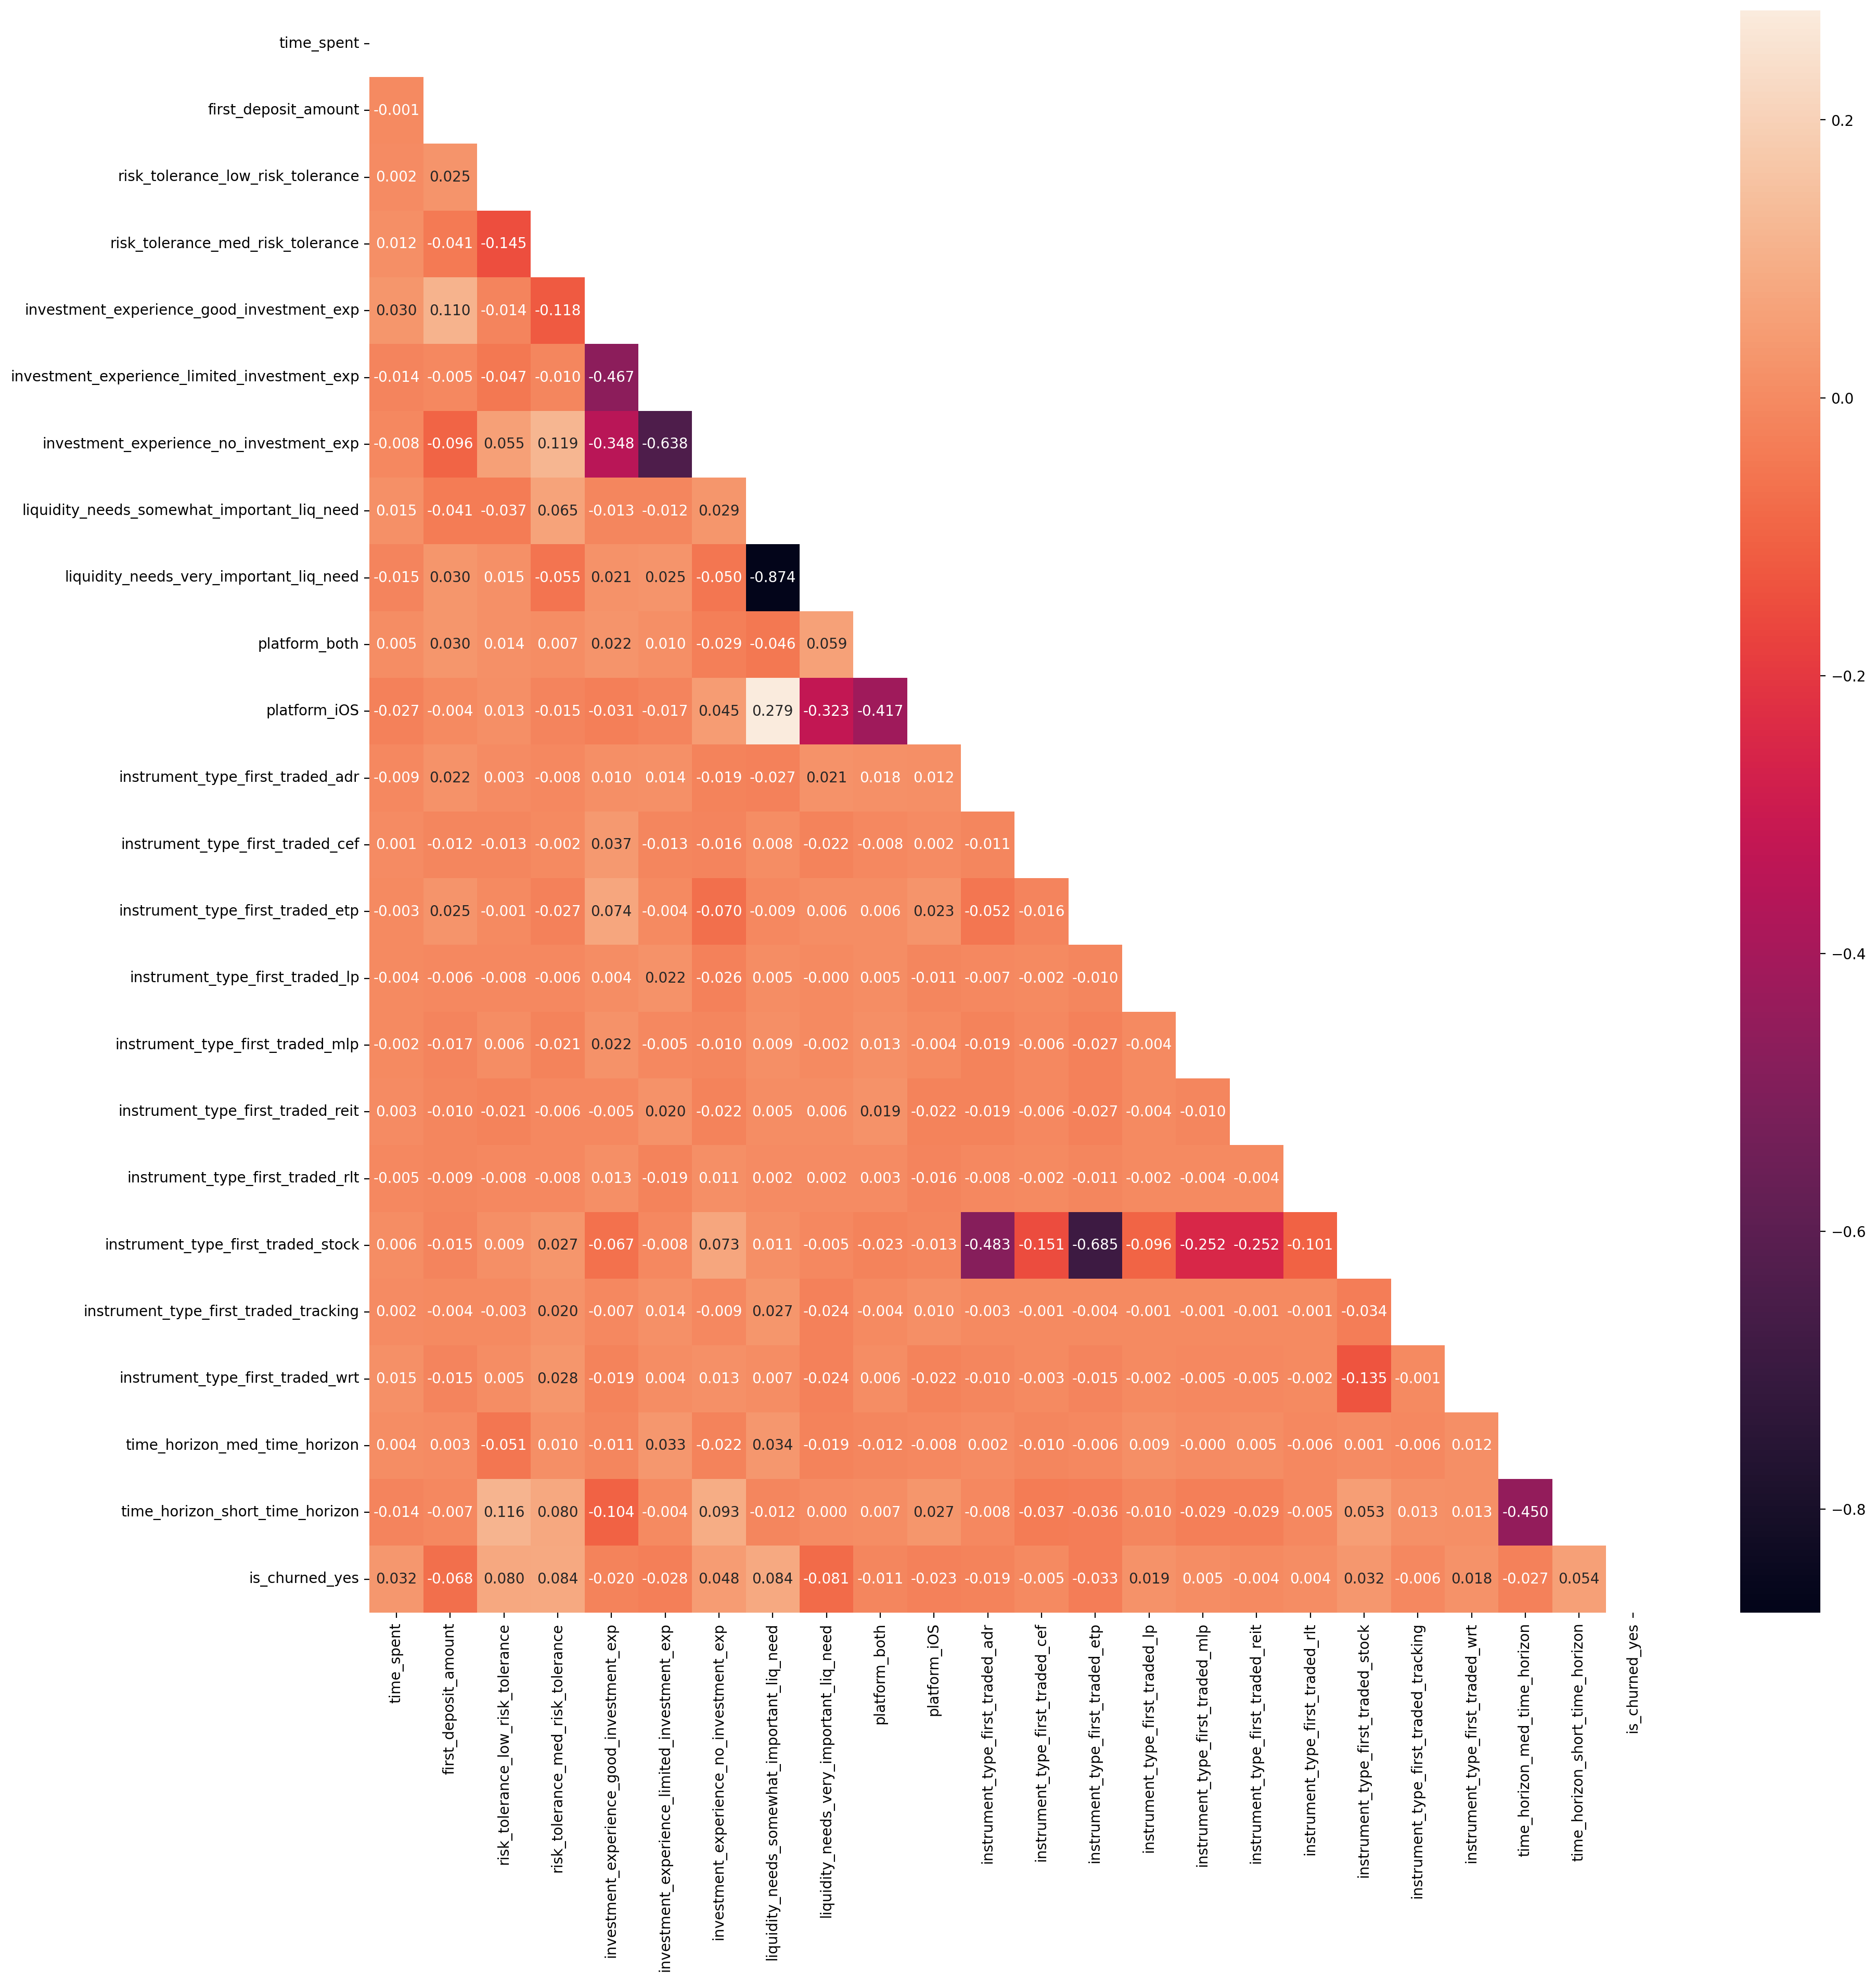

In [41]:
plt.figure(figsize=(20,20),dpi=200)
sns.heatmap(new_df.corr(),annot=True, fmt='.3f', mask=np.triu(new_df.corr()));
plt.show()

In [42]:
new_df.corr()['is_churned_yes']

time_spent                                      0.032368
first_deposit_amount                           -0.068256
risk_tolerance_low_risk_tolerance               0.080313
risk_tolerance_med_risk_tolerance               0.084157
investment_experience_good_investment_exp      -0.020265
investment_experience_limited_investment_exp   -0.027944
investment_experience_no_investment_exp         0.047981
liquidity_needs_somewhat_important_liq_need     0.084072
liquidity_needs_very_important_liq_need        -0.080685
platform_both                                  -0.011482
platform_iOS                                   -0.023420
instrument_type_first_traded_adr               -0.019003
instrument_type_first_traded_cef               -0.004731
instrument_type_first_traded_etp               -0.033299
instrument_type_first_traded_lp                 0.019178
instrument_type_first_traded_mlp                0.005101
instrument_type_first_traded_reit              -0.004332
instrument_type_first_traded_rl

In [43]:
X = new_df.drop(['is_churned_yes'],axis=1)
y = new_df['is_churned_yes']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [45]:
scaler = RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [46]:
n_estimators=[64,100,128,200]
max_features= [2,4,6,8,10,11]
bootstrap = [True,False]
oob_score = [True,False]

In [47]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [48]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc,param_grid)

In [49]:
grid_rfc.fit(X_train_scaled,y_train)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 8, 10, 11],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [50]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 11, 'n_estimators': 64, 'oob_score': True}

In [51]:
grid_rfc_pred =grid_rfc.predict(X_test_scaled)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


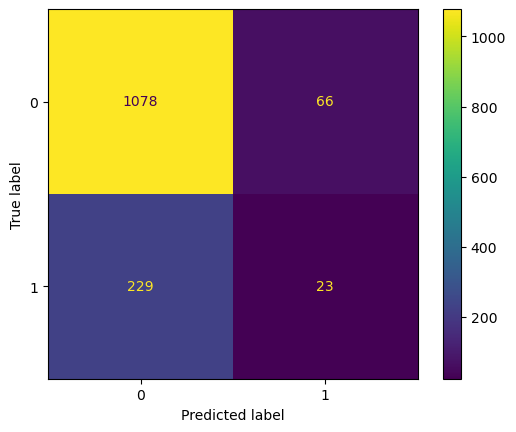

In [52]:
plot_confusion_matrix(grid_rfc,X_test_scaled,y_test)
plt.show()

In [53]:
confusion_matrix(y_test,grid_rfc_pred)

array([[1078,   66],
       [ 229,   23]], dtype=int64)

In [54]:
print(classification_report(y_test,grid_rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1144
           1       0.26      0.09      0.13       252

    accuracy                           0.79      1396
   macro avg       0.54      0.52      0.51      1396
weighted avg       0.72      0.79      0.75      1396



In [55]:
rfc_ac=grid_rfc.score(X_test_scaled,y_test)
rfc_ac

0.7886819484240688

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
param_grid={"n_estimators":[1,5,10,20,40,100,200],'max_depth':[3,4,5,6,10,12]}

In [58]:
gb_model = GradientBoostingClassifier()

In [59]:
grid_gb = GridSearchCV(gb_model,param_grid)

In [60]:
grid_gb.fit(X_train_scaled,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 10, 12],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200]})

In [61]:
grid_gb.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [62]:
predictions = grid_gb.predict(X_test_scaled)

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1144
           1       0.00      0.00      0.00       252

    accuracy                           0.82      1396
   macro avg       0.41      0.50      0.45      1396
weighted avg       0.67      0.82      0.74      1396



C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
grid_gb.best_estimator_.feature_importances_

array([0.2531008 , 0.44007965, 0.12832601, 0.07777442, 0.        ,
       0.        , 0.        , 0.02614451, 0.02661853, 0.        ,
       0.        , 0.00680544, 0.        , 0.        , 0.01211847,
       0.        , 0.        , 0.        , 0.00194694, 0.        ,
       0.01276151, 0.00999826, 0.00432547])

In [65]:
feat_import = grid_gb.best_estimator_.feature_importances_

In [66]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [67]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
first_deposit_amount,0.440080
time_spent,0.253101
risk_tolerance_low_risk_tolerance,0.128326
risk_tolerance_med_risk_tolerance,0.077774
liquidity_needs_very_important_liq_need,0.026619
liquidity_needs_somewhat_important_liq_need,0.026145
instrument_type_first_traded_wrt,0.012762
instrument_type_first_traded_lp,0.012118
time_horizon_med_time_horizon,0.009998
instrument_type_first_traded_adr,0.006805


In [68]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,23.0,0.043478,0.10415,0.0,0.0,0.001947,0.019453,0.44008


In [69]:
imp_feats.sort_values('Importance')

,Importance
instrument_type_first_traded_tracking,0.000000
instrument_type_first_traded_rlt,0.000000
investment_experience_good_investment_exp,0.000000
investment_experience_limited_investment_exp,0.000000
investment_experience_no_investment_exp,0.000000
instrument_type_first_traded_reit,0.000000
instrument_type_first_traded_mlp,0.000000
platform_both,0.000000
platform_iOS,0.000000
instrument_type_first_traded_etp,0.000000


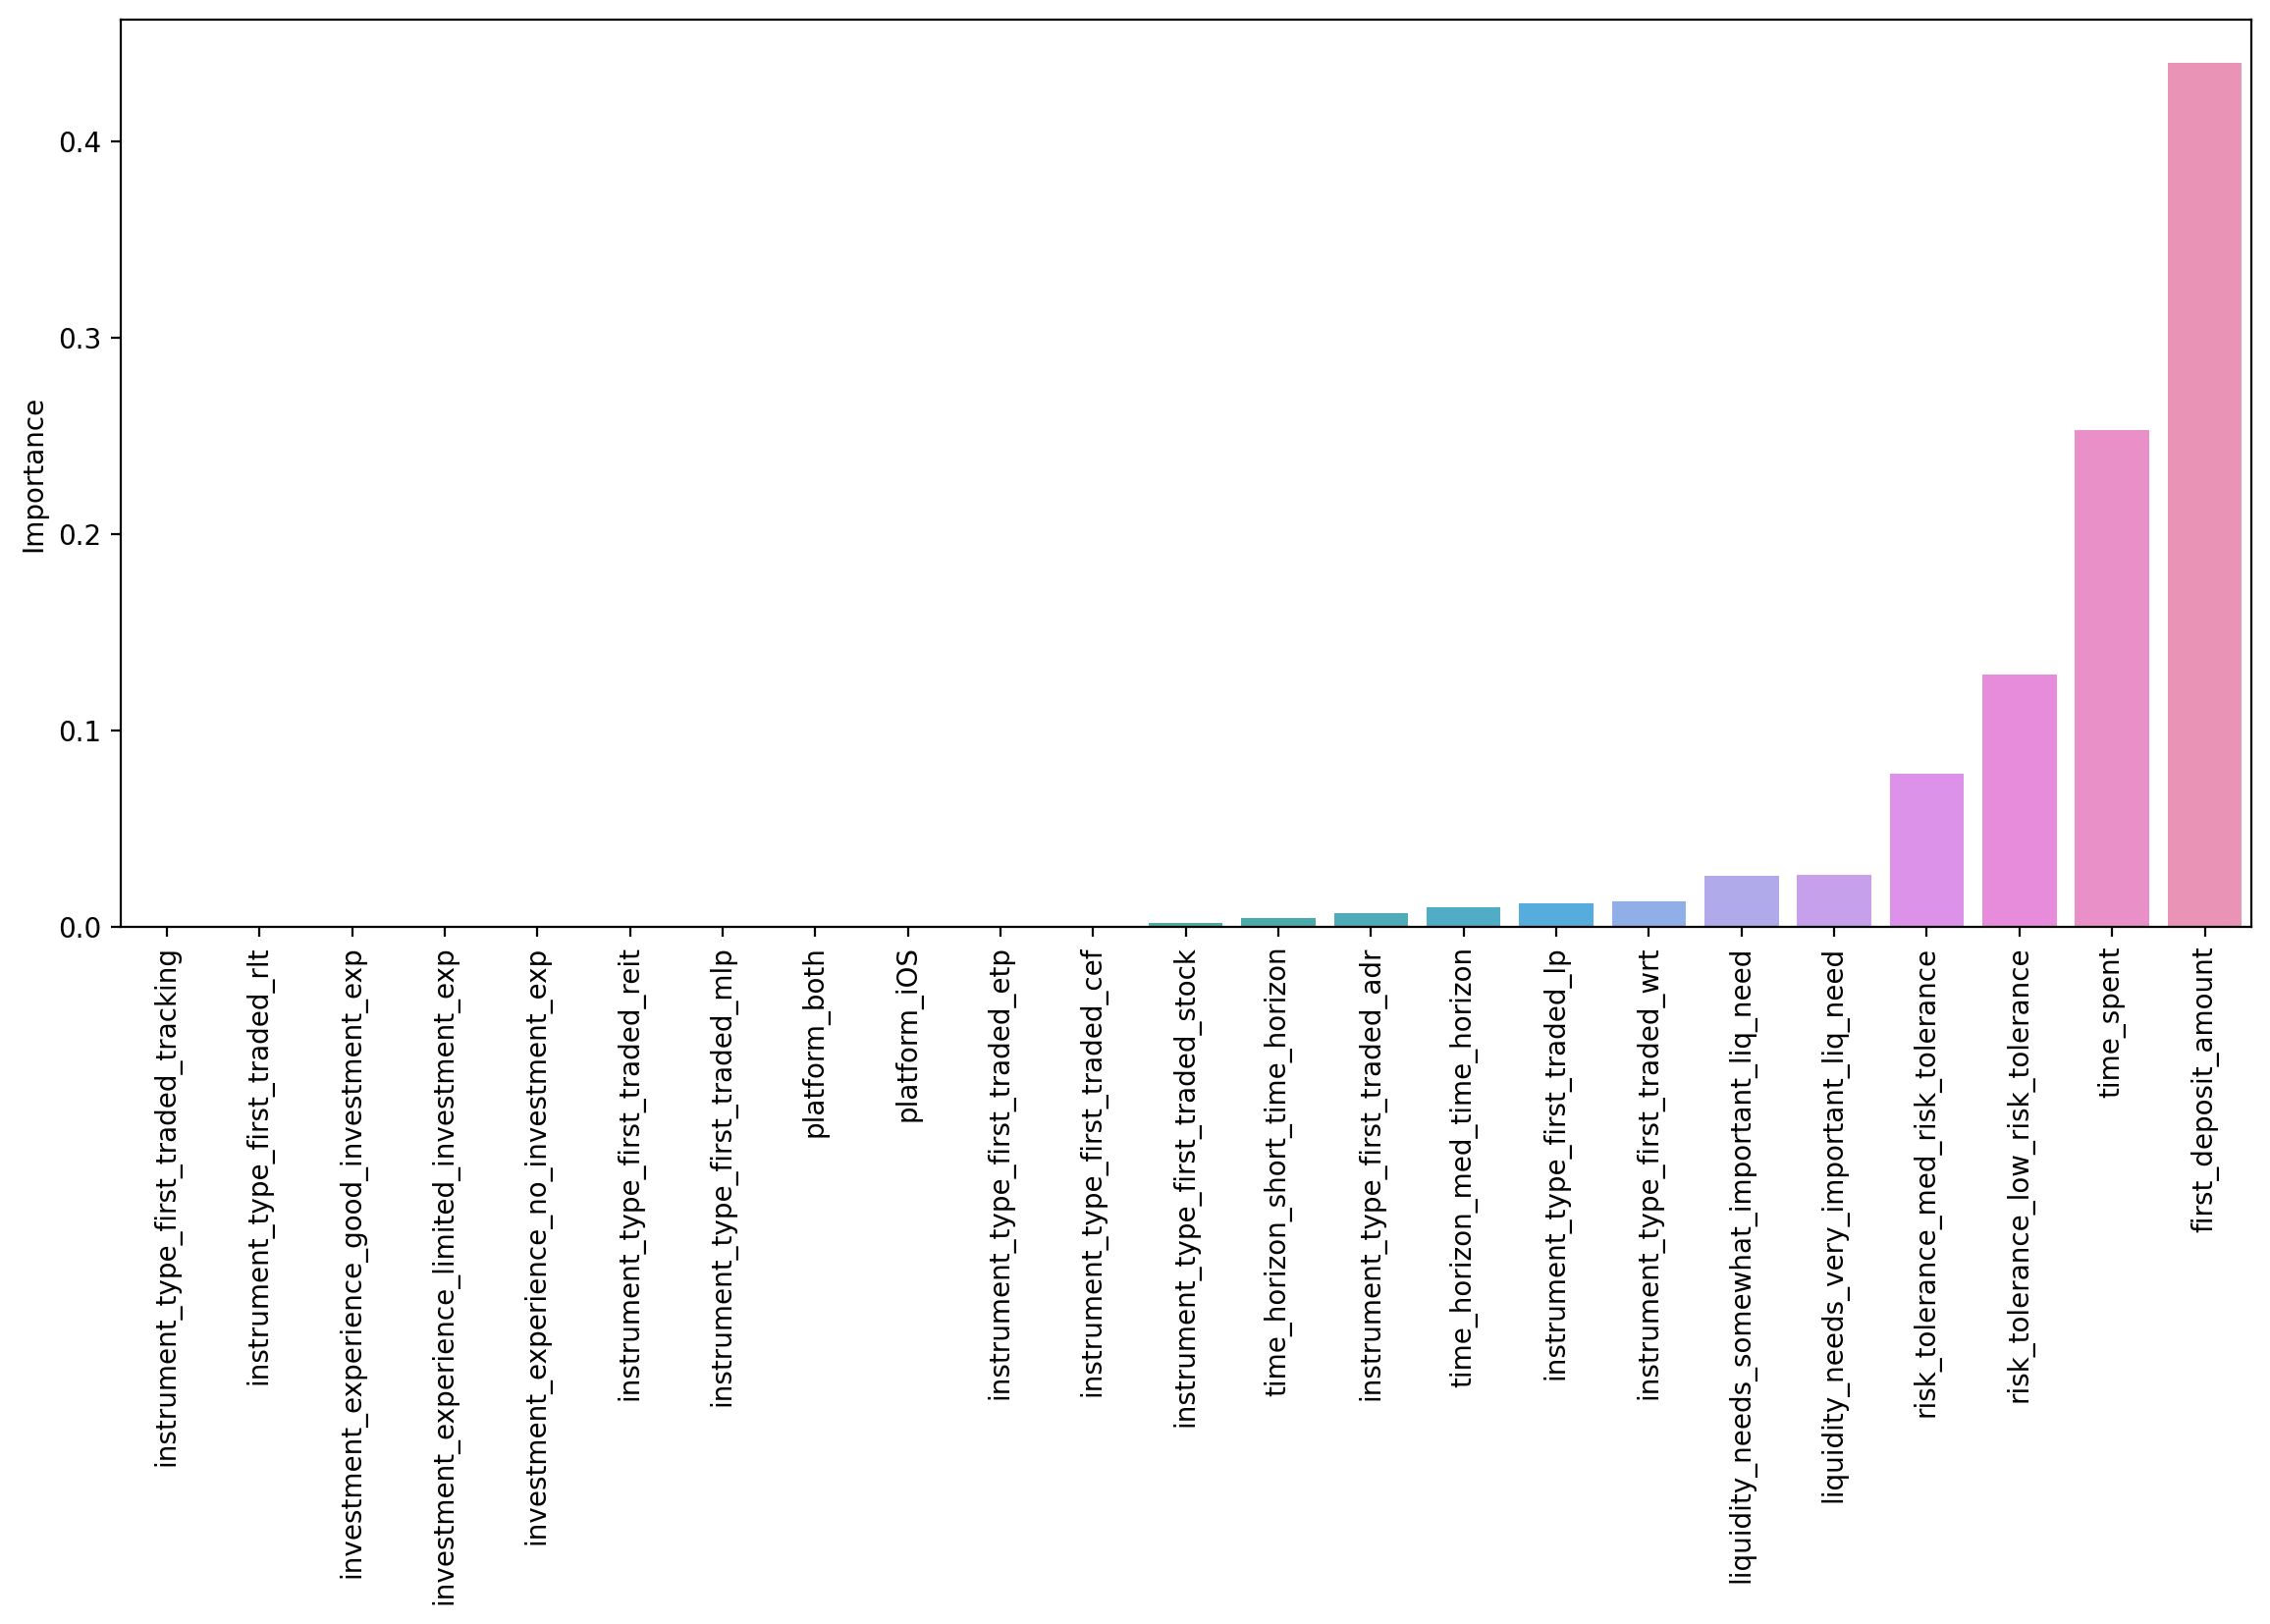

In [70]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);
plt.show()

In [71]:
# new_user_data['instrument_type_first_traded'] =new_user_data['instrument_type_first_traded'].replace('0', np.nan)

In [72]:
# numeric_transformer = Pipeline(steps=[("scaler", RobustScaler())])
# categorical_transformer=Pipeline(steps=[    
# ('imputer',SimpleImputer(strategy='most_frequent',missing_values='0')),
# ('onehot',OneHotEncoder(handle_unknown='ignore'))]) 
# preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numerical_cols),
#                                                ("cat", categorical_transformer, categorical_cols)])

In [73]:
# from sklearn.ensemble import RandomForestClassifier
# rf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])

In [74]:
# X = new_user_data.drop(['is_churned'],axis=1)
# y = new_user_data['is_churned']

In [75]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101,stratify=y)

In [76]:
# rf.fit(X_train,y_train)

# rf.score(X_train,y_train)

In [77]:
# rf.score(X_test,y_test)